## OVR和OVO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

In [2]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

0.7894736842105263


<ipython-input-2-0f21d17bf4ab>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


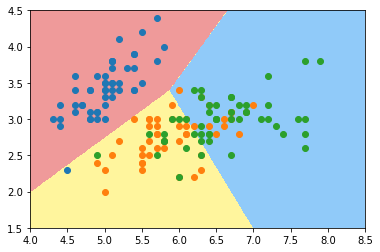

In [6]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [7]:
log_reg_2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg_2.fit(X_train, y_train)
print(log_reg_2.score(X_test, y_test))

0.7894736842105263


<ipython-input-2-0f21d17bf4ab>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


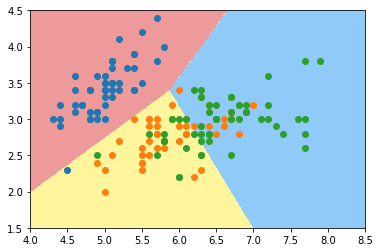

In [8]:
plot_decision_boundary(log_reg_2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### 使用所有的数据

In [9]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [10]:
log_reg_3 = LogisticRegression()
log_reg_3.fit(X_train, y_train)
print(log_reg_3.score(X_test, y_test))

1.0


In [11]:
log_reg_4 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg_4.fit(X_train, y_train)
print(log_reg_4.score(X_test, y_test))

1.0


### ovr类

In [12]:
%%time
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

Wall time: 19.9 ms


0.9736842105263158

In [13]:
%%time
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

Wall time: 17 ms


1.0